# Parameters

In [ ]:
random_seed = 1
save_to_disk = False
model_name='test_nn'

# Set seed

In [ ]:
from numpy.random import seed
seed(random_seed)
from tensorflow.random import set_seed
set_seed(random_seed)

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

In [ ]:
from knowledge_distillation.io import load_adult, ASSETS_PATH
from knowledge_distillation.ensemble import UnbiasedAverage
from knowledge_distillation.processing import *
from knowledge_distillation.nn import *

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Input
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Load data

In [ ]:
df = load_adult()

# Preprocessing

In [ ]:
X, y, target_names = scale_onehot(df, target='salary')

X_train, X_test, y_train, y_test = split_with_seed(X, y)

/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif

# Train a simple fully connected NN

In [ ]:
model = KerasClassifier(
    build_fn=create_nn,
    **train_params,
    verbose=1
)

In [ ]:
model.fit(X_train, y_train)

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 2.3619 - accuracy: 0.8136 - val_loss: 0.5978 - val_accuracy: 0.7626
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.8361 - val_loss: 0.4327 - val_accuracy: 0.8428
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8354 - val_loss: 0.4514 - val_accuracy: 0.8146
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8325 - val_loss: 0.3879 - val_accuracy: 0.8409
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.8294 - val_loss: 0.4094 - val_accuracy: 0.8284
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8335 - val_loss: 0.3810 - val_accuracy: 0.8451
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8413 - val_loss: 0.4451 - val_accuracy: 0.7821
Epoch 

In [ ]:
model.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6976      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0

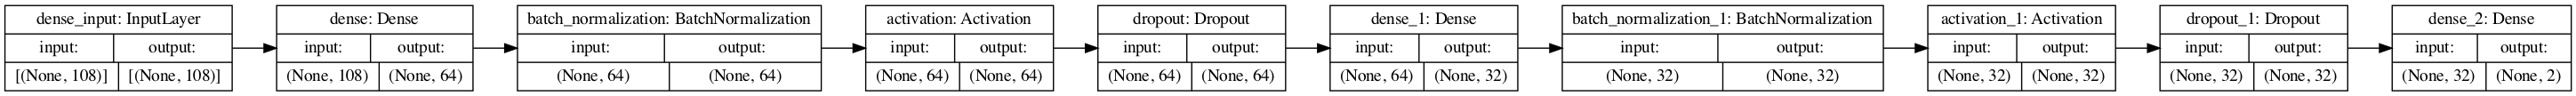

In [ ]:
keras.utils.plot_model(model.model, show_shapes=True, dpi=100, rankdir="LR")

# Evaluate single model

In [ ]:
evaluate_model(X_train, X_test, y_train, y_test, model, model_name, save_to_disk=save_to_disk, target_names=target_names)


  1/204 [..............................] - ETA: 20s

/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


51/51 [==============================] - 0s 637us/step
=== Train ===
              precision    recall  f1-score   support

       <=50K       0.90      0.88      0.89     19778
        >50K       0.64      0.69      0.67      6270

    accuracy                           0.83     26048
   macro avg       0.77      0.79      0.78     26048
weighted avg       0.84      0.83      0.84     26048


=== Test ===
              precision    recall  f1-score   support

       <=50K       0.90      0.88      0.89      4942
        >50K       0.65      0.69      0.67      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.79      0.78      6513
weighted avg       0.84      0.83      0.84      6513




/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,model_name,data,accuracy,precision,recall,f1,auc
0,test_nn,train,0.833845,0.643385,0.694896,0.668149,0.786395
1,test_nn,test,0.834024,0.645314,0.692553,0.668099,0.785774


In [ ]:
z = classification_report(y_train, model.predict(X_train), labels=[0, 1], target_names=target_names)

/usr/local/anaconda3/envs/distillation/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


204/204 [==============================] - 0s 678us/step


# Save model

In [ ]:
if save_to_disk:
    save_keras_classifier(model, model_name)